In [1]:
import pandas as pd 
import numpy as np 
from pandas.testing import assert_frame_equal
from pandas_datareader import data as web

# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Define dataframe variable
btc = pd.DataFrame()

# Define stock that will be analysed
asset = 'BTC-USD'
 
# Import data into dataframe
btc = web.DataReader(asset, data_source='yahoo', start='01-01-2015')

btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550.0,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650.0,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400.0,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100.0,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,43962800.0,274.473999


In [3]:
# calculate Log Returns 
btc['Log_Returns'] = np.log(btc['Close'] / btc['Close'].shift(1)) * 100
btc['365d_RollingVolatility'] = btc.Log_Returns.rolling(window=365, min_periods=1).std()
btc['100d_RollingVolatility'] = btc.Log_Returns.rolling(window=100, min_periods=1).std()
btc['50d_RollingVolatility'] = btc.Log_Returns.rolling(window=50, min_periods=1).std()

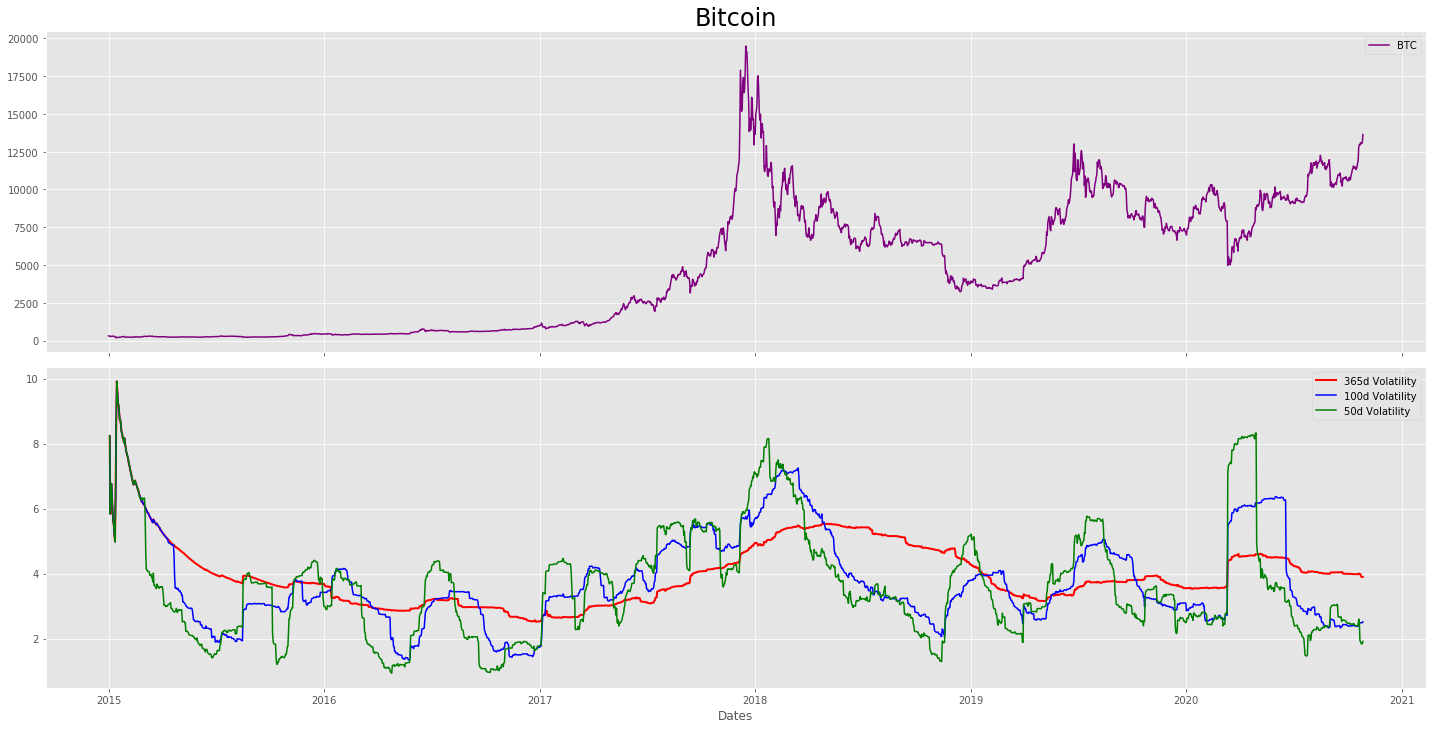

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 10))

ax1.plot(btc['Close'], color='purple', label = 'BTC')
ax1.grid(True)
ax1.set_title('Bitcoin', fontsize=24)
ax1.legend()

ax2.plot(btc.index, btc['365d_RollingVolatility'], label='365d Volatility', c='r', lw = 2)
ax2.plot(btc.index, btc['100d_RollingVolatility'], label='100d Volatility', c='b')
ax2.plot(btc.index, btc['50d_RollingVolatility'], label='50d Volatility', c='g')

ax2.grid(True)
ax2.legend()

plt.tight_layout()

plt.xlabel('Dates')
plt.show()

In [11]:
# Define dataframe variable
tsla = pd.DataFrame()

# Define stock that will be analysed
asset1 = 'TSLA'
 
# Import data into dataframe
tsla = web.DataReader(asset1, data_source='yahoo', start='01-01-2015')

tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001


In [12]:
# calculate Log Returns 
tsla['Log_Returns'] = np.log(tsla['Close'] / tsla['Close'].shift(1)) * 100
tsla['365d_RollingVolatility'] = tsla.Log_Returns.rolling(window=365, min_periods=1).std()
tsla['100d_RollingVolatility'] = tsla.Log_Returns.rolling(window=100, min_periods=1).std()
tsla['50d_RollingVolatility'] = tsla.Log_Returns.rolling(window=500, min_periods=1).std()

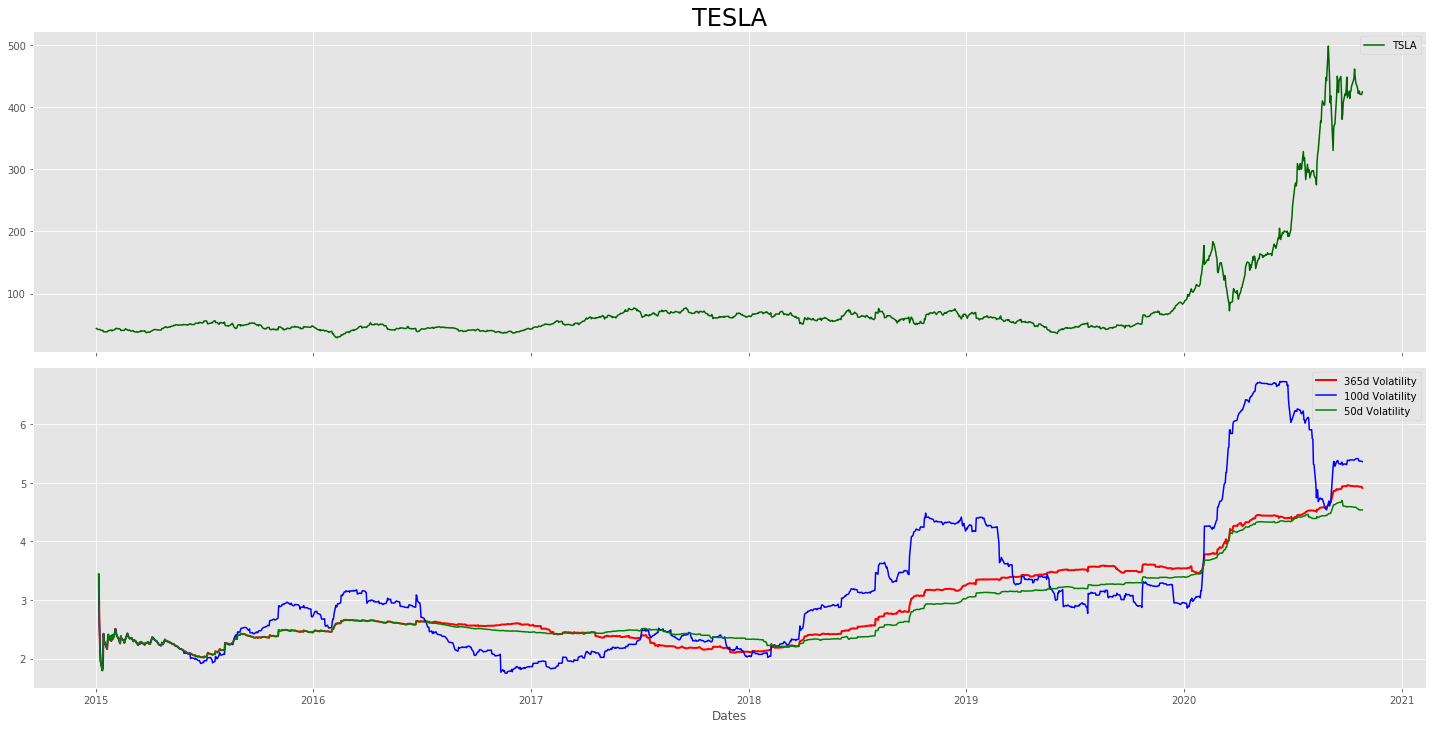

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 10))

ax1.plot(tsla['Close'], color='darkgreen', label = 'TSLA')
ax1.grid(True)
ax1.set_title('TESLA', fontsize=24)
ax1.legend()

ax2.plot(tsla.index, tsla['365d_RollingVolatility'], label='365d Volatility', c='r', lw = 2)
ax2.plot(tsla.index, tsla['100d_RollingVolatility'], label='100d Volatility', c='b')
ax2.plot(tsla.index, tsla['50d_RollingVolatility'], label='50d Volatility', c='g')
ax2.grid(True)
ax2.legend()

plt.tight_layout()

plt.xlabel('Dates')
plt.show()

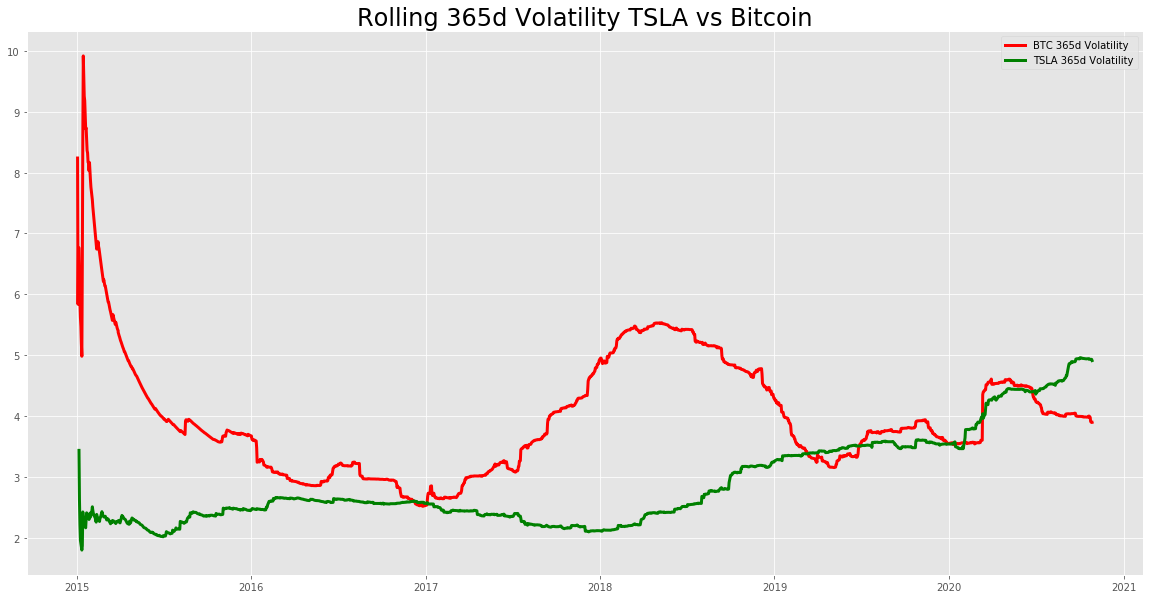

In [19]:
f, ax = plt.subplots(figsize=(20,10))

ax.plot(btc['365d_RollingVolatility'], color='red', label = 'BTC 365d Volatility', lw = 3)
ax.plot(tsla.index, tsla['365d_RollingVolatility'], label='TSLA 365d Volatility', c='green', lw = 3)
ax.grid(True)
ax.set_title('Rolling 365d Volatility TSLA vs Bitcoin', fontsize=24)
ax.legend()